# Parameter simulation in ESG module

Modelling stocks with GBM and rates with Ornstein–Uhlenbeck SDE <br>
GBM:           $dS(t) = \mu S(t) dt + \sigma S(t) dB(t)$ <br>
O-U (Vasicek): $dr(t) = a(\mu - r(t)) dt + \sigma dB(t)$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from source.noise import NoiseGenerator
from source.esg import EconomicScenarioGenerator

Simulation parameters

In [2]:
with open('./data/params.pkl', 'rb') as f:
     s0, Corr, variance, mean, ar = pickle.load(f)

In [3]:
NG = NoiseGenerator()
dB = NG.brown_steps(Corr, 100 * 60)

In [4]:
s0

AK_SV            224.480000
AK_WORLD        4041.233665
AK_WORLD_LOC     591.744572
ALTERNATIVA      100.000000
CPI              278.000000
FASTIGHETER      100.400000
KRED_SV          196.460000
RB_UTL           329.810800
RB_SV_1_RATE       0.029400
RB_SV_5            0.039880
RB_SV_15           0.048920
SPREAD             0.003790
Name: 2003-12-31, dtype: float64

In [ ]:
N = 1
interval = 12
T = 5
steps = interval * T

In [33]:
S0 = s0.to_numpy()
a = ar.to_numpy()
mu = mean.to_numpy()
sigma = np.sqrt(variance.to_numpy())
Noise = dB

In [34]:
ESG = EconomicScenarioGenerator(S0, a, mu, sigma, Noise)

In [35]:
S1, R1 = ESG.get_scenarios(N, steps, interval)

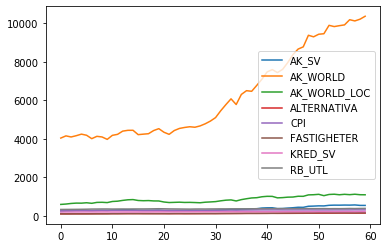

In [37]:
i = 0
for s in S1[0]:
    plt.plot(s, label=s0.index[np.where(a == 0)[0][i]])
    i += 1
plt.legend()

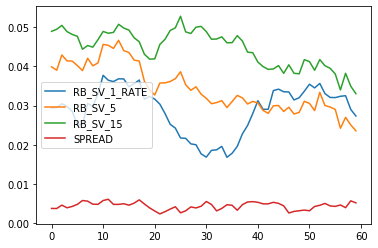

In [38]:
i = 0
for r in R1[0]:
    plt.plot(r, label=s0.index[np.where(a != 0)[0][i]])
    i += 1
plt.legend()

Pick index of a stock and a rate

In [5]:
Si = np.where(s0.index == 'AK_SV')[0][0]
ri = np.where(s0.index == 'RB_SV_1_RATE')[0][0]

In [23]:
S0 = s0.to_numpy()[[Si, ri]]
a = ar.to_numpy()[[Si, ri]]
mu = mean.to_numpy()[[Si, ri]]
sigma = np.sqrt(variance.to_numpy()[[Si, ri]])
Noise = dB[[Si, ri],:]

In [24]:
a,mu

(array([0.        , 0.09134547]), array([ 0.0942865 , -0.00646125]))

In [25]:
sigma

array([0.16053899, 0.00712545])

In [26]:
ESG = EconomicScenarioGenerator(S0, a, mu, sigma, Noise)

In [27]:
N = 10000
steps = 60
interval = 12

In [28]:
ESG.get_scenarios(N, steps, interval)[0].shape

(10000, 1, 60)

In [29]:
AK, RB = ESG.get_scenarios(N, steps, interval)

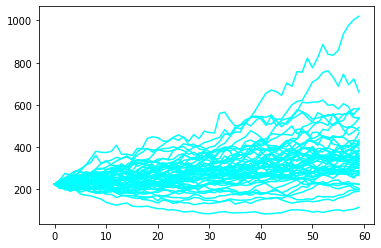

In [30]:
for s in AK[:50]:
    plt.plot(s.T, color='cyan')

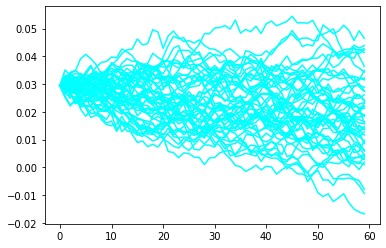

In [31]:
for r in RB[:50]:
    plt.plot(r.T, color='cyan')